## API keys are removed

In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras
!pip install tensorflow

In [3]:
import tensorflow

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
import numpy as np

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b72a3086530044cfb979750da0de0c96 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_2 = client_b72a3086530044cfb979750da0de0c96.get_object(Bucket='naturaldisastersintensityanalysis-donotdelete-pr-psqvouyln2d4tr', Key='dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [8]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [9]:
pwd

'/home/wsuser/work'

In [10]:
import os
filenames = os.listdir('/home/wsuser/work/dataset/dataset/train_set')

In [11]:
train_ds = train_datagen.flow_from_directory('/home/wsuser/work/dataset/dataset/train_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

test_ds = train_datagen.flow_from_directory('/home/wsuser/work/dataset/dataset/test_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

Found 742 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32,(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
history = model.fit(train_ds,
                    steps_per_epoch = len(train_ds),
                    epochs = 20,
                    validation_data = test_ds,
                    validation_steps = len(test_ds))
    

Epoch 1/20
149/149 [==============================] - 32s 212ms/step - loss: 1.2858 - accuracy: 0.3908 - val_loss: 1.2135 - val_accuracy: 0.4343
Epoch 2/20
149/149 [==============================] - 31s 210ms/step - loss: 1.0448 - accuracy: 0.5283 - val_loss: 0.9250 - val_accuracy: 0.6970
Epoch 3/20
149/149 [==============================] - 31s 210ms/step - loss: 0.8623 - accuracy: 0.6536 - val_loss: 0.7369 - val_accuracy: 0.7626
Epoch 4/20
149/149 [==============================] - 31s 206ms/step - loss: 0.7681 - accuracy: 0.6671 - val_loss: 0.7203 - val_accuracy: 0.7424
Epoch 5/20
149/149 [==============================] - 31s 210ms/step - loss: 0.7540 - accuracy: 0.7062 - val_loss: 0.7390 - val_accuracy: 0.6919
Epoch 6/20
149/149 [==============================] - 31s 212ms/step - loss: 0.6856 - accuracy: 0.7358 - val_loss: 0.6481 - val_accuracy: 0.7172
Epoch 7/20
149/149 [==============================] - 31s 211ms/step - loss: 0.5905 - accuracy: 0.7736 - val_loss: 0.6282 - val_ac

In [17]:
model.save('model.h5')

In [18]:
!tar -zcvf model.tgz model.h5

model.h5


In [19]:
ls -la

total 17972
drwxr-x--- 4 wsuser wscommon    4096 May 30 09:40 ./
drwxrwx--- 1 wsuser wscommon    4096 May 30 09:20 ../
drwxrwx--- 3 wsuser wscommon    4096 May 30 09:29 dataset/
-rw-rw---- 1 wsuser wscommon 9812072 May 30 09:40 model.h5
-rw-rw---- 1 wsuser wscommon 8568018 May 30 09:40 model.tgz
drwxr-x--- 2 wsuser wscommon    4096 May 30 09:20 .virtual_documents/


In [21]:
result = model.evaluate(test_ds)

40/40 [==============================] - 6s 131ms/step - loss: 0.6594 - accuracy: 0.8081


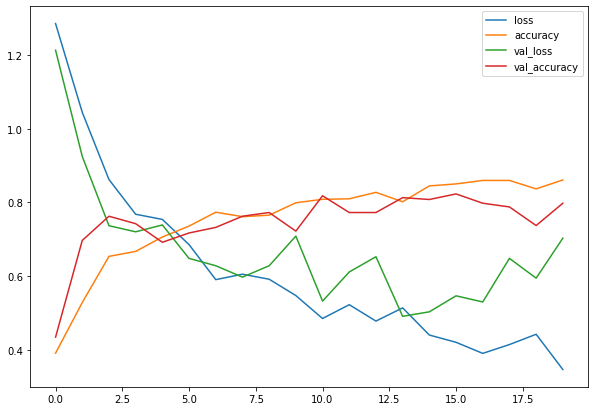

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [23]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 28.4 MB/s eta 0:00:01


In [24]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : ""
}
client = APIClient(wml_credentials)

In [25]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [26]:
space_uid = guid_from_space_name(client, 'Natural Disasters Intensity Analysis And Classification')
print('space uid: ' + space_uid)

space uid: c5a8fe50-8690-4da3-87b1-5849ad114d23


In [26]:
client.set.default_space(space_uid)

'SUCCESS'

In [27]:
client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [28]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9-horovod")
software_spec_uid

'dda170cc-ca67-5da7-9b7a-cf84c6987fae'

In [29]:
model_details = client.repository.store_model(model='model.tgz', meta_props= {
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})

model_id = client.repository.get_model_id(model_details)

In [30]:
model_id

'362eeca3-ab0e-403e-855a-d06c54a2a7b1'

In [31]:
client.repository.download(model_id, 'my-model.tar.gz')

Successfully saved model content to file: 'my-model.tar.gz'


'/home/wsuser/work/my-model.tar.gz'